### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## Problem Statement 

- This project ensures how the price of a laptop is affected by features such as RAM, GPU, Inches, Company, OS and so on- 

## Data Collection

- Data Source: https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data
- The data consists of 12 columns and 1303 rows

In [200]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

## Data Preprocessing & Data Cleaning

In [32]:
# load the dataset
df = pd.read_csv("data/laptop_price.csv",encoding="ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [33]:
# remove laptop_id as we have index
df = df.drop(["laptop_ID"],axis=1)

In [34]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [35]:
df.shape

(1303, 12)

In [36]:
# Check for null values
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [38]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [39]:
# Turn the columns names into lower case
df = df.rename(columns=str.lower)

In [40]:
# Rename price_euros to price
df = df.rename(columns={"price_euros":"price"})

In [41]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [42]:
df["company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [43]:
companies = df["company"].unique()
len(companies)

19

In [44]:
df.shape

(1303, 12)

In [45]:
# drop duplicates
df = df.drop_duplicates()

In [46]:
df.shape

(1275, 12)

### Converting weight, ram, cpu and memory into numerical data

In [47]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [55]:
def convert_column(column, value, converted_type):
    """
    
    Replaces the given column values with empty string
    
    Example:
    convert_column("ram","GB",int)
    > 4GB converted to 4
    
    """
    df[column] = df[column].str.replace(value,"")
    df[column] = df[column].astype(converted_type)
    return df

In [ ]:
convert_column("ram", "GB", int)
convert_column("weight", "kg", float)

In [59]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


From Screen Resolution we can get more information:
- touchscreen? (Yes / No)
- Resolution
- Screen Type

We can store these 3 informations into 3 different columns

In [62]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

In [63]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)

In [64]:
df["screentype"].head()

0    IPS Panel Retina Display 
1                             
2                     Full HD 
3    IPS Panel Retina Display 
4    IPS Panel Retina Display 
Name: screentype, dtype: object

In [65]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True)

In [67]:
df["touchscreen"].value_counts()

touchscreen
Touchscreen    188
Name: count, dtype: int64

In [70]:
df["touchscreen"] = df["touchscreen"].replace("Touchscreen",1) 
df["touchscreen"] = df["touchscreen"].replace(np.nan,0)

In [72]:
df["touchscreen"].value_counts()

touchscreen
0.0    1087
1.0     188
Name: count, dtype: int64

In [75]:
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [76]:
df["screentype"].value_counts()

screentype
                             547
                             296
IPS Panel                    261
                              75
IPS Panel                     68
IPS Panel Retina Display      17
IPS Panel                     11
Name: count, dtype: int64

It seems there are extra trailing spaces after IPS Panel
There are only 2 types of screentypes:
- IPS Panel
- IPS Panel Retins Display (Apple laptops)

In [77]:
# Removes trailing white spaces 
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

screentype
                         918
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [78]:
# Converts blank spaces into NaN
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

screentype
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [79]:
df['screentype'].value_counts()

screentype
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [80]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [81]:
# Now, we don't need screenresolution
df = df.drop('screenresolution', axis=1)

In [82]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [83]:
df['resolution'].value_counts()

resolution
1920x1080    833
1366x768     290
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [85]:
df['screentype'].value_counts()

screentype
IPSPanel                 340
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [86]:
df["touchscreen"].value_counts()

touchscreen
0.0    1087
1.0     188
Name: count, dtype: int64

In [87]:
# extracts frequencies from CPU column
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [88]:
df["cpu_freq"].value_counts()

cpu_freq
2.5GHz     282
2.8GHz     165
2.7GHz     163
1.6GHz     123
2.3GHz      86
1.8GHz      78
2.6GHz      74
2GHz        67
1.1GHz      53
2.4GHz      50
3GHz        19
2.9GHz      19
2.0GHz      19
1.2GHz      15
1.44GHz     12
2.2GHz      11
1.5GHz      10
1.3GHz       6
3.6GHz       5
3.1GHz       3
2.1GHz       3
2.50GHz      3
1.9GHz       2
0.9GHz       2
1.60GHz      1
3.2GHz       1
1.0GHz       1
1.92GHz      1
2.70GHz      1
Name: count, dtype: int64

In [89]:
convert_column("cpu_freq", "GHz", float)

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1920x1080,IPSPanel,1.0,2.5
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200x1800,IPSPanel,1.0,2.5
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,1366x768,NaN,0.0,1.6
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366x768,NaN,0.0,2.5


In [90]:
# Remove freq from cpu column
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [91]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [94]:
df["memory"]

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
1274              500GB HDD
Name: memory, Length: 1275, dtype: object

We can get lots of information from this column, there are 2 hard drives, there are 4 different types of disks:
- HDD
- SSD
- Flash Storage
- Hybrid

Let's create new columns to include all this information

In [95]:
df['memory'].value_counts()

memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [96]:
df["memory_1"] = df["memory"]

In [97]:
# Convert everything into GB
df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

memory_1
256 SSD                         412
1000 HDD                        216
500 HDD                         124
512 SSD                         114
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              73
32 Flash Storage                 36
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         14
64 Flash Storage                 13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
16 Flash Storage                  7
1000 Hybrid                       7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD 

In [98]:
# Remove white spaces
df["memory2"] = df["memory_1"].str.replace(r" ","")
df["memory2"].value_counts()

memory2
256SSD                    412
1000HDD                   216
500HDD                    124
512SSD                    114
128SSD+1000HDD             94
128SSD                     74
256SSD+1000HDD             73
32FlashStorage             36
2000HDD                    16
512SSD+1000HDD             14
1000SSD                    14
64FlashStorage             13
256SSD+2000HDD             10
256FlashStorage             8
16FlashStorage              7
1000Hybrid                  7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
24

In [102]:
# Seperate into Single Drive and Double Drive
memory_1 = []
memory_2 = []

for i in df["memory2"]:
    if len(re.findall(r'\+',i)) == 1: # Double Drive
        one = re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: #Single Drive
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append("NaN")


In [103]:
# Seperate memory types
memory_1_gb = []
memory_1_type = []
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [107]:
memory_1_gb[0], memory_1_type[0]

('128', 'SSD')

In [109]:
memory_2_gb = []
memory_2_type = []

for i in memory_2:
    if i != "NaN":
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append("NaN")
        memory_2_gb.append(0)

In [115]:
# Add the above values to dataFrame
df['memory_1(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [116]:
df["memory_1(GB)"] = df["memory_1(GB)"].astype(float)
df["memory_2(GB)"] = df["memory_2(GB)"].astype(float)

In [117]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq,memory_1,memory2,memory_1(GB),memory_1_type,memory_2(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,0.0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,NaN,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [118]:
# Drop the below columns after conversion
df=df.drop(['memory_1','memory2','memory'], axis=1)

In [119]:
# Replace NaN with np.nan
df = df.replace({"NaN":np.nan})

In [120]:
df.head()

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq,memory_1(GB),memory_1_type,memory_2(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


In [121]:
# Extract the brand name from cpu column
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

cpu_brand
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64

In [122]:
df[df["cpu_brand"]=="Samsung"]

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq,memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1.0,2.0,32.0,FlashStorage,0.0,NaN,Samsung


In [123]:
# As we have only 1 Samsung based cpu_brand, Let's drop it for simplying the analysis
df = df.drop(1191)

In [124]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

gpu_brand
Intel     704
Nvidia    396
AMD       174
Name: count, dtype: int64

In [126]:
df.head()

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq,memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [134]:
# Rename the columns
df = df.rename(columns={
    "ram": "ram(GB)",
    "opsys": "os",
    "weight": "weight(KG)",
    "cpu_freq": "cpu_freq(GHz)"
})

In [133]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,os,weight(KG),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1274
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1274 non-null   object 
 1   product        1274 non-null   object 
 2   typename       1274 non-null   object 
 3   inches         1274 non-null   float64
 4   cpu            1274 non-null   object 
 5   ram(GB)        1274 non-null   int32  
 6   gpu            1274 non-null   object 
 7   os             1274 non-null   object 
 8   weight(KG)     1274 non-null   float64
 9   price          1274 non-null   float64
 10  resolution     1274 non-null   object 
 11  screentype     356 non-null    object 
 12  touchscreen    1274 non-null   float64
 13  cpu_freq(GHz)  1274 non-null   float64
 14  memory_1(GB)   1274 non-null   float64
 15  memory_1_type  1274 non-null   object 
 16  memory_2(GB)   1274 non-null   float64
 17  memory_2_type  208 non-null    object 
 18  cpu_brand    

In [136]:
df.to_csv('laptop-clean.csv', index=False)

## Exploratory Data Analysis

In [137]:
df1 = pd.read_csv("data/laptop-clean.csv")

In [138]:
df1.head()

,company,product,typename,inches,cpu,ram(GB),gpu,os,weight(KG),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [139]:
df_clean = df1.copy()

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1274 non-null   object 
 1   product        1274 non-null   object 
 2   typename       1274 non-null   object 
 3   inches         1274 non-null   float64
 4   cpu            1274 non-null   object 
 5   ram(GB)        1274 non-null   int64  
 6   gpu            1274 non-null   object 
 7   os             1274 non-null   object 
 8   weight(KG)     1274 non-null   float64
 9   price          1274 non-null   float64
 10  resolution     1274 non-null   object 
 11  screentype     356 non-null    object 
 12  touchscreen    1274 non-null   float64
 13  cpu_freq(GHz)  1274 non-null   float64
 14  memory_1(GB)   1274 non-null   float64
 15  memory_1_type  1274 non-null   object 
 16  memory_2(GB)   1274 non-null   float64
 17  memory_2_type  208 non-null    object 
 18  cpu_bran

In [163]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

def countPlot(df, col, title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sns.countplot(x=col,data=df, palette="mako_r", order=df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

### What brand is the most frequent from the above dataframe?
> Dell, Lenovo and HP cover more than 50% of the total number of laptops

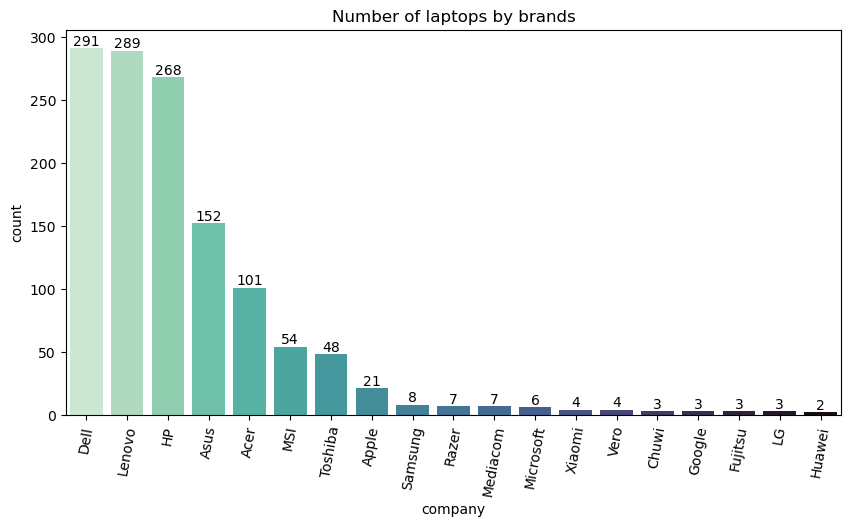

In [164]:
countPlot(df1, "company", "Number of laptops by brands")

### What type of laptop is most frequent?


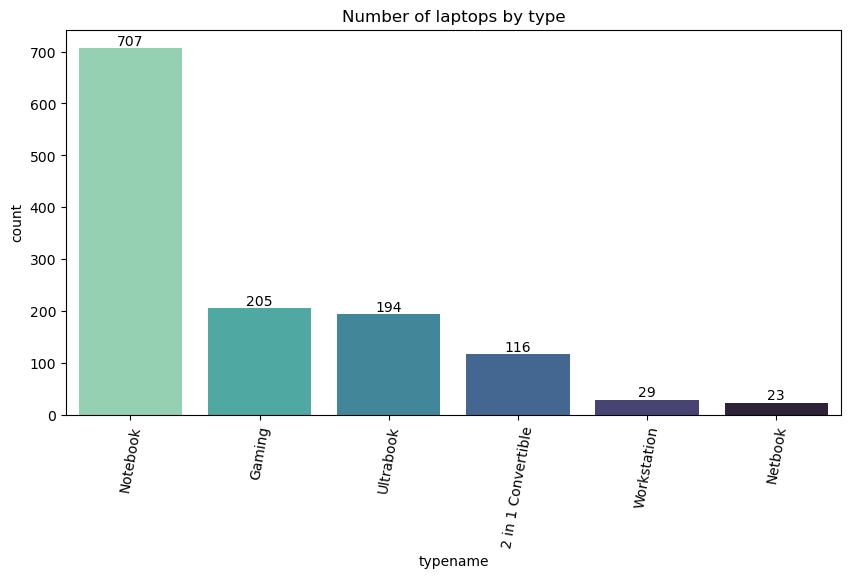

In [165]:
# countPlot()
countPlot(df1, "typename","Number of laptops by type")

In [166]:
print("Most of the laptop are notebooks which comprise {:.2f}% of all the laptops.".format(len(df1[df1["typename"]=="Notebook"])*100 / len(df1["typename"])))

Most of the laptop are notebooks which comprise 55.49% of all the laptops.


### Which size is most popular?

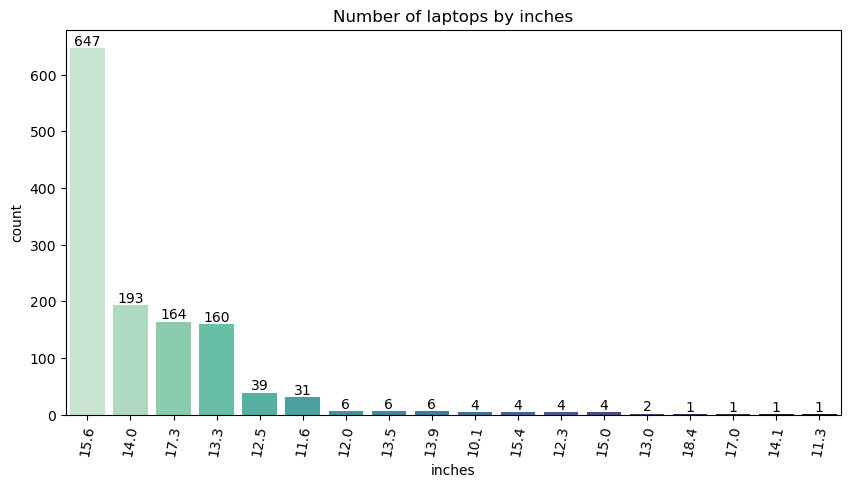

In [167]:
countPlot(df1, "inches","Number of laptops by inches")

In [168]:
print('Most laptops have 15.6 inches, which make {:.2f}% of the total laptops'.format(len(df1[df1['inches']==15.6])*100/len(df1)))

Most laptops have 15.6 inches, which make 50.78% of the total laptops


In [169]:
# Most used laptops based on inches
inches_list = df["inches"].value_counts().index[:6].tolist()
inches_list

[15.6, 14.0, 17.3, 13.3, 12.5, 11.6]

In [170]:
df_clean = df_clean[df_clean['inches'].isin(inches_list)]

In [171]:
df_clean.shape

(1234, 20)

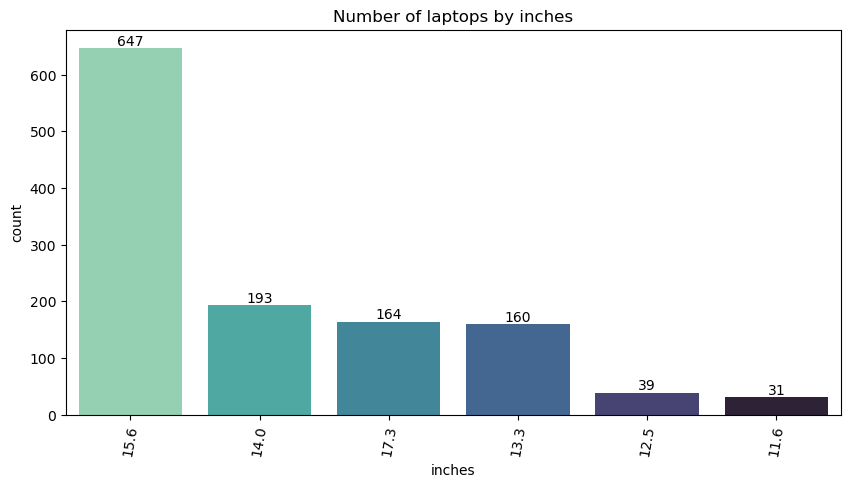

In [172]:
countPlot(df_clean, "inches","Number of laptops by inches")

In [173]:
print("We have removed {} outliers".format(len(df1) - len(df_clean)))

We have removed 40 outliers


### How is weight distributed among the laptops?

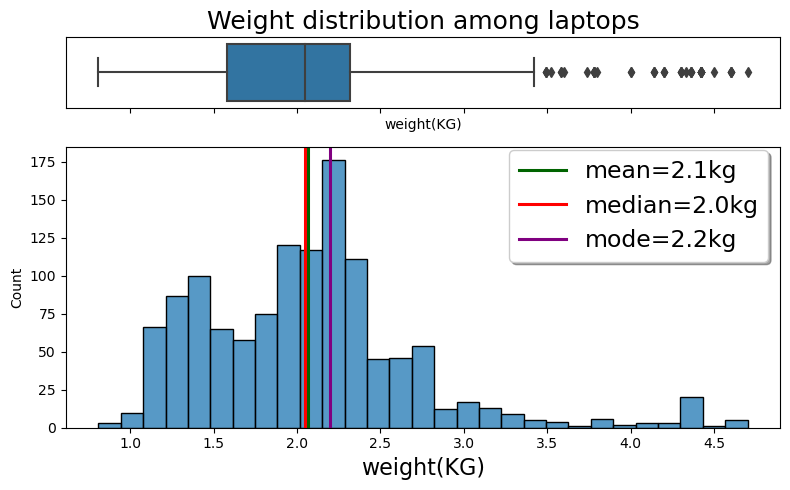

In [174]:
num_plot(df_clean, "weight(KG)", "Weight distribution among laptops", 'kg')

### How is price distribute among laptops?

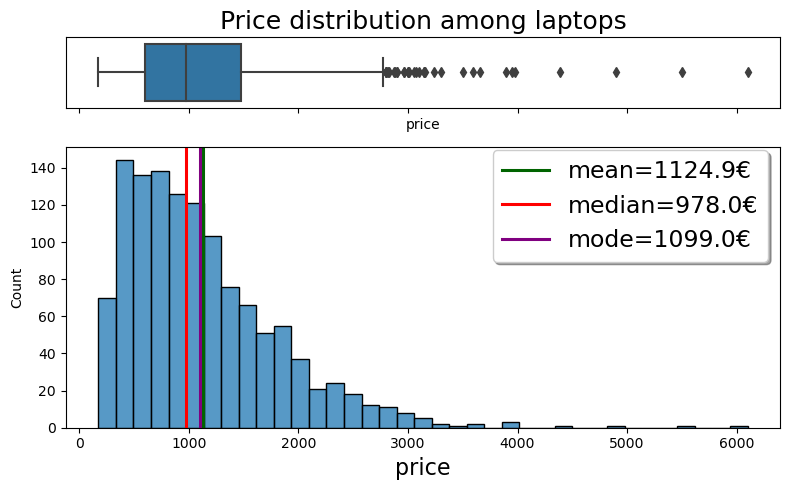

In [176]:
num_plot(df_clean, "price", "Price distribution among laptops", "€")

There are a very few laptops over 4000 euros

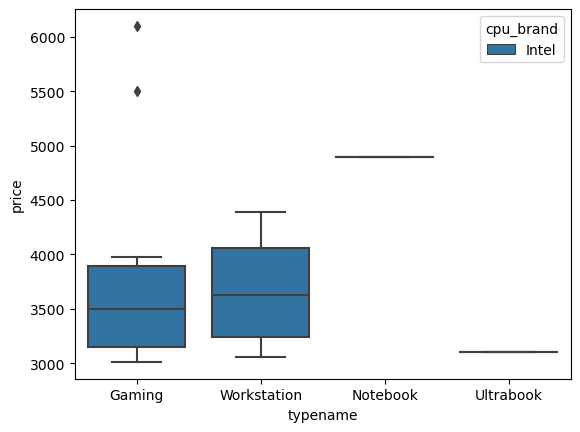

In [178]:
sns.boxplot(x='typename', y='price', data=df[df['price']>3000], hue='cpu_brand');

In [184]:
df[df['price']>4000] # The most expensive laptop is Razer Blade Pro and it's a gaming laptop

,company,product,typename,inches,cpu,ram(GB),gpu,os,weight(KG),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,3840x2160,NaN,1.0,2.9,1000.0,SSD,0.0,NaN,Intel,Nvidia
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6,32,Nvidia Quadro M2200M,Windows 10,2.50,4899.0,3840x2160,IPSPanel,0.0,3.1,1000.0,SSD,0.0,NaN,Intel,Nvidia
749,HP,Zbook 17,Workstation,17.3,Intel Xeon E3-1535M v5,16,Nvidia Quadro M2000M,Windows 7,3.00,4389.0,1920x1080,IPSPanel,0.0,2.9,256.0,SSD,0.0,NaN,Intel,Nvidia
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,3840x2160,NaN,1.0,2.9,512.0,SSD,0.0,NaN,Intel,Nvidia


### How is RAM distributed among laptops?

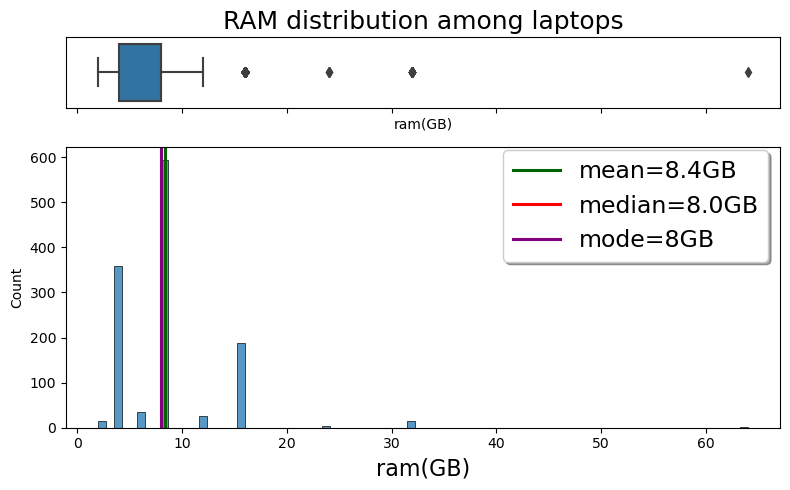

In [185]:
num_plot(df_clean, "ram(GB)", "RAM distribution among laptops", "GB")

In [186]:
print('Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops'.format(len(df[df['ram(GB)']==8])*100/len(df)))

Most laptops have 8 GB RAM, which make 48.12% of the total laptops


### How is CPU frequency Distributed among laptops?

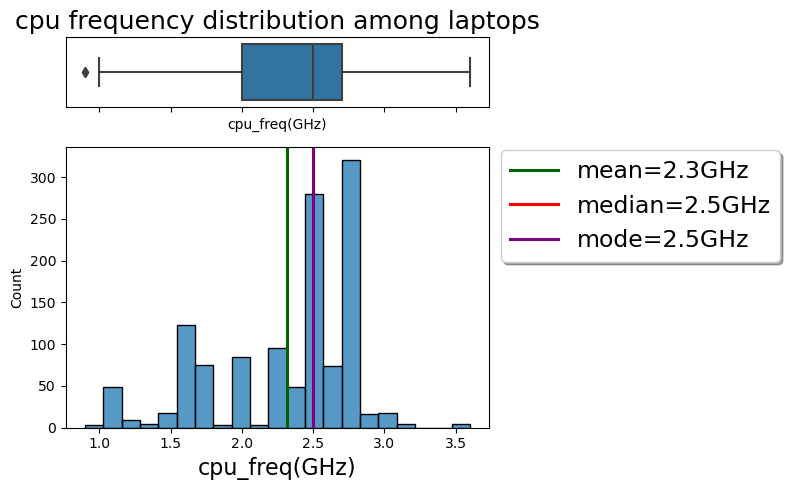

In [188]:
num_plot(df_clean, "cpu_freq(GHz)", "cpu frequency distribution among laptops", "GHz")

In [189]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df),2)))

Most laptops have 2.5 GHz CPU, which make 22.37% of the total laptops


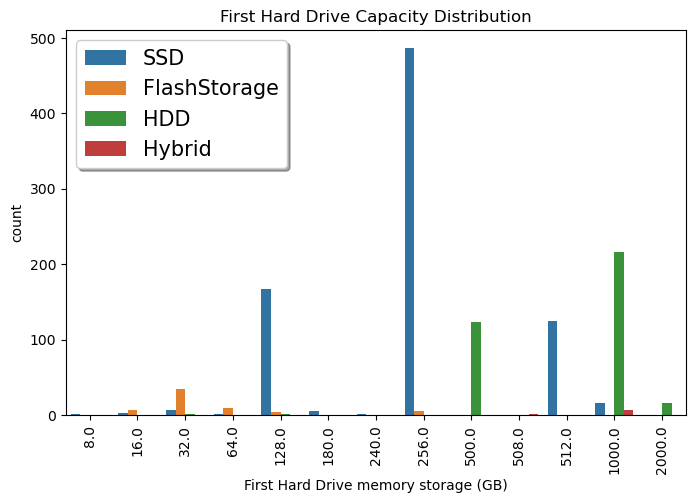

In [191]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1(GB)', data=df_clean, hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

Most of the laptops are 256GB storage and are SSD, over 1TB memory Storage they are HDD

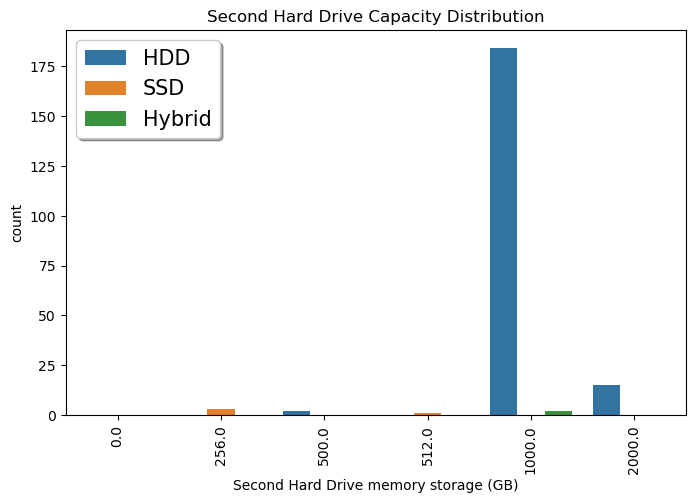

In [193]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_2(GB)', data=df_clean, hue='memory_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

Most of the second drive memory storage are 1TB HDD

### What are the top 15 most common GPUs?

In [201]:
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()

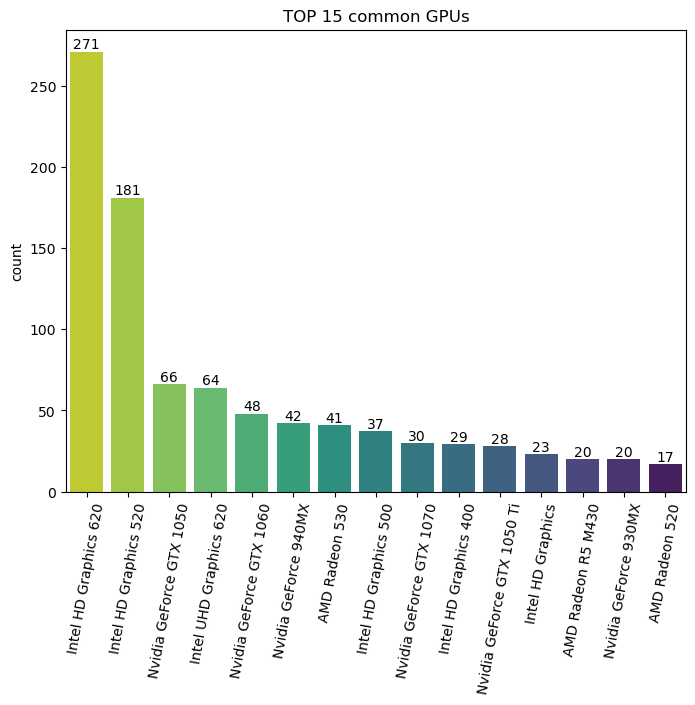

In [203]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu', data=df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

The most common GPUs are Intel HD Graphics 620, Intel HD Graphics 520

In [204]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

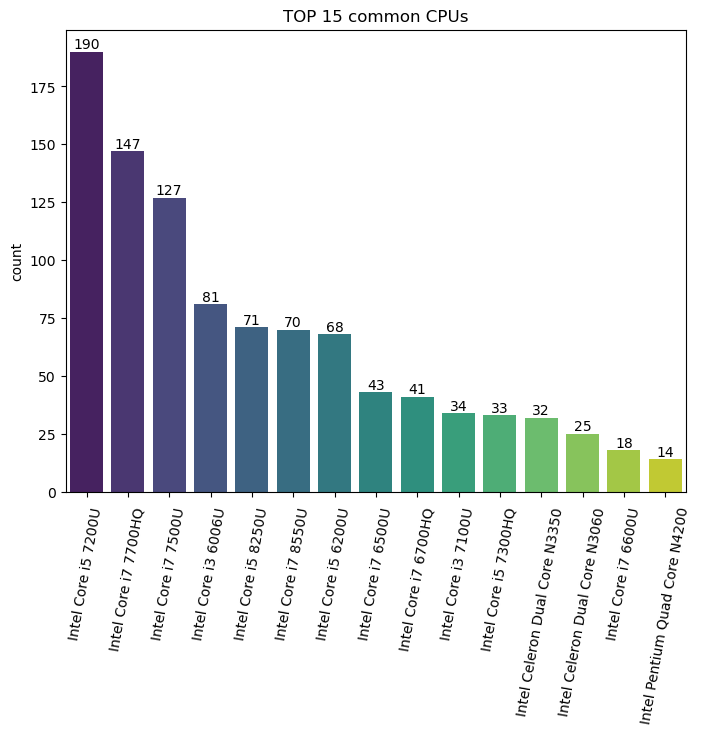

In [205]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='cpu', data=df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

- The most common CPU's are ['Intel Core i5 7200U ', 'Intel Core i7 7700HQ ', 'Intel Core i7 7500U ']
- Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) and 2 are Celerons (low-end)

In [210]:
df["company"].value_counts()

company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [211]:
# There are companies with very less laptops
company_list = df['company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

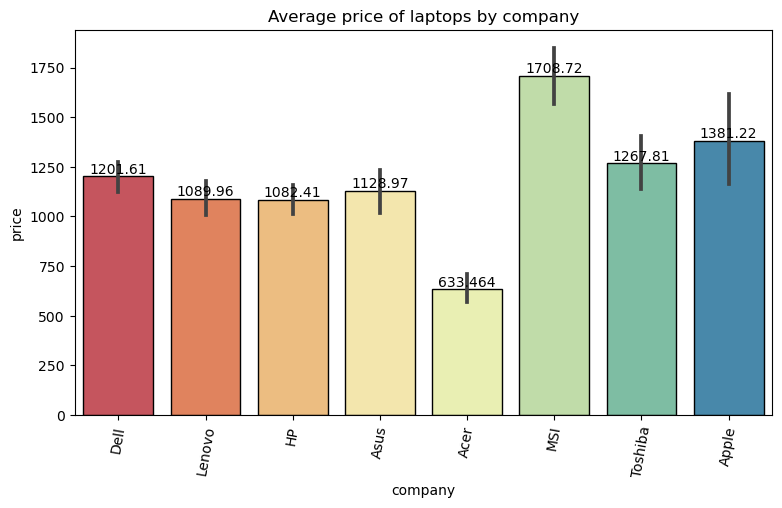

In [215]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company', y='price', data=df_clean[df_clean['company'].isin(company_list)],
                order=company_list, 
                palette='Spectral', 
                edgecolor="black")
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

- MSI laptops are on average the most expensive, with an average price of 1708.72
- Apple laptops are the second most expensive laptops and Toshiba's are 3rd
- Acer are the cheapest, with an average price of 626
- Laptops from Dell, Lenovo, HP and Asus have, on average, a price around 1000

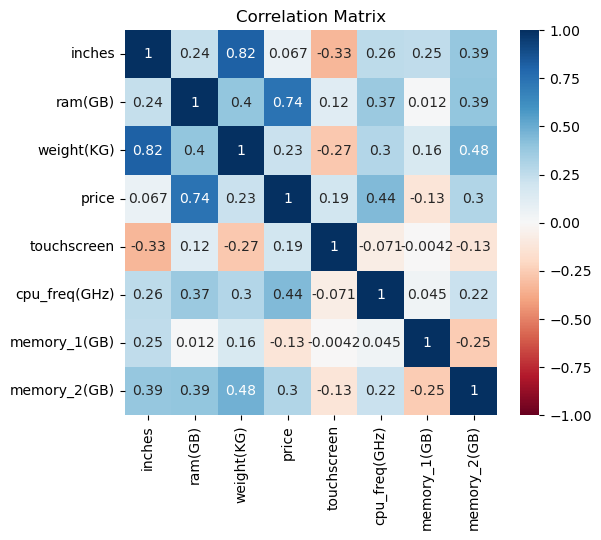

In [222]:
plt.figure(figsize=(6,5))
sns.heatmap(df_clean.corr(numeric_only=True), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Insights from the correlation matrix:

- RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric
- CPU Freq has a quite moderate positive correlation with the price (+0.45)
- Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

In [223]:
# Both Inches and Weight are highly correlated we can remove one of them
df_clean = df_clean.drop("weight(KG)",axis=1)

In [224]:
df_clean.head()

,company,product,typename,inches,cpu,ram(GB),gpu,os,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1(GB),memory_1_type,memory_2(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel
5,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420,4,AMD Radeon R5,Windows 10,400.00,1366x768,NaN,0.0,3.0,500.0,HDD,0.0,NaN,AMD,AMD


In [226]:
df_clean.to_csv('laptop-clean.csv', index=False)